## EXAMEN EDA

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### DATASET

In [16]:
df_forestCovtype = pd.read_csv("covtype.data")

In [17]:
# Poner el nombre de las columnas en el dataset

titulo_columnas = ["Elevation", "Aspect", "Slope", "Horizontal_Distance_To_Hydrology",
            "Vertical_Distance_To_Hydrology", "Horizontal_Distance_To_Roadways",
            "Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm",
            "Horizontal_Distance_To_Fire_Points"]
wilderness_columnas = ["Wilderness_Area_"+str(i) for i in range(1,5)]
soil_columnas = ["Soil_Type_"+str(i) for i in range(1,41)]

titulo_columnas += wilderness_columnas + soil_columnas + ["Cover_Type"]
df_forestCovtype.columns = titulo_columnas

df_forestCovtype

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Soil_Type_40,Cover_Type
0,2590,56,2,212,-6,390,220,235,151,6225,...,0,0,0,0,0,0,0,0,0,5
1,2804,139,9,268,65,3180,234,238,135,6121,...,0,0,0,0,0,0,0,0,0,2
2,2785,155,18,242,118,3090,238,238,122,6211,...,0,0,0,0,0,0,0,0,0,2
3,2595,45,2,153,-1,391,220,234,150,6172,...,0,0,0,0,0,0,0,0,0,5
4,2579,132,6,300,-15,67,230,237,140,6031,...,0,0,0,0,0,0,0,0,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,...,0,0,0,0,0,0,0,0,0,3
581007,2391,152,19,67,12,95,240,237,119,845,...,0,0,0,0,0,0,0,0,0,3
581008,2386,159,17,60,7,90,236,241,130,854,...,0,0,0,0,0,0,0,0,0,3
581009,2384,170,15,60,5,90,230,245,143,864,...,0,0,0,0,0,0,0,0,0,3


In [18]:
# Unir las  columnas de wilderness y soil en una sola columna, sumando los valores para ver de cuantos tipos hay

df_forestCovtype["Wilderness_Area"] = df_forestCovtype[wilderness_columnas].max(axis = 1)
df_forestCovtype.drop(wilderness_columnas, axis = 1, inplace = True)

df_forestCovtype["Soil_Type"] = df_forestCovtype[soil_columnas].max(axis = 1)
df_forestCovtype.drop(soil_columnas, axis = 1, inplace = True )

df_forestCovtype = df_forestCovtype.reset_index(drop = True)
df_forestCovtype

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
0,2590,56,2,212,-6,390,220,235,151,6225,5,1,1
1,2804,139,9,268,65,3180,234,238,135,6121,2,1,1
2,2785,155,18,242,118,3090,238,238,122,6211,2,1,1
3,2595,45,2,153,-1,391,220,234,150,6172,5,1,1
4,2579,132,6,300,-15,67,230,237,140,6031,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
581006,2396,153,20,85,17,108,240,237,118,837,3,1,1
581007,2391,152,19,67,12,95,240,237,119,845,3,1,1
581008,2386,159,17,60,7,90,236,241,130,854,3,1,1
581009,2384,170,15,60,5,90,230,245,143,864,3,1,1


In [19]:
df_forestCovtype.isna().sum()

Elevation                             0
Aspect                                0
Slope                                 0
Horizontal_Distance_To_Hydrology      0
Vertical_Distance_To_Hydrology        0
Horizontal_Distance_To_Roadways       0
Hillshade_9am                         0
Hillshade_Noon                        0
Hillshade_3pm                         0
Horizontal_Distance_To_Fire_Points    0
Cover_Type                            0
Wilderness_Area                       0
Soil_Type                             0
dtype: int64

In [20]:
df_forestCovtype.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581011 entries, 0 to 581010
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype
---  ------                              --------------   -----
 0   Elevation                           581011 non-null  int64
 1   Aspect                              581011 non-null  int64
 2   Slope                               581011 non-null  int64
 3   Horizontal_Distance_To_Hydrology    581011 non-null  int64
 4   Vertical_Distance_To_Hydrology      581011 non-null  int64
 5   Horizontal_Distance_To_Roadways     581011 non-null  int64
 6   Hillshade_9am                       581011 non-null  int64
 7   Hillshade_Noon                      581011 non-null  int64
 8   Hillshade_3pm                       581011 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  581011 non-null  int64
 10  Cover_Type                          581011 non-null  int64
 11  Wilderness_Area                     581011 non-null 

In [21]:
df_forestCovtype.drop(df_forestCovtype.dropna().index)

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type


In [22]:
df_forestCovtype.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type,Wilderness_Area,Soil_Type
count,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.000000,581011.0,581011.0
mean,2959.365926,155.656988,14.103723,269.428236,46.418935,2350.149779,212.146033,223.318701,142.528253,1980.283828,2.051465,1.0,1.0
std,279.984569,111.913733,7.488234,212.549538,58.295250,1559.254343,26.769909,19.768711,38.274561,1324.184340,1.396500,0.0,0.0
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0,1.0
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,1.000000,1.0,1.0
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,2.000000,1.0,1.0
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,2.000000,1.0,1.0
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,7.000000,1.0,1.0


In [23]:
df_forestCovtype.dtypes

Elevation                             int64
Aspect                                int64
Slope                                 int64
Horizontal_Distance_To_Hydrology      int64
Vertical_Distance_To_Hydrology        int64
Horizontal_Distance_To_Roadways       int64
Hillshade_9am                         int64
Hillshade_Noon                        int64
Hillshade_3pm                         int64
Horizontal_Distance_To_Fire_Points    int64
Cover_Type                            int64
Wilderness_Area                       int64
Soil_Type                             int64
dtype: object

### EJERCICIO 1

Para conseguir un dataset con una dimensión reducidad, aplica la técnica de Selección de variables basada en árbol de decisión mediante las importancias de cada variable (Decision Trees Importances):

- Filtra el tablón para quedarnos solamente con las variables que aglutinan hasta el 95% de la información que se requiere para estimar la variable objetivo.
- random_state=100

In [31]:
target = "Cover_Type"
features = [x for x in df_forestCovtype.columns if x!= target]
print(target)
print(features)

Cover_Type
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area', 'Soil_Type']


In [30]:
df_forestCovtype[target]

0         5
1         2
2         2
3         5
4         2
         ..
581006    3
581007    3
581008    3
581009    3
581010    3
Name: Cover_Type, Length: 581011, dtype: int64

In [32]:
from sklearn.tree import DecisionTreeRegressor

arbol_importancia = DecisionTreeRegressor(max_depth=len(features)+10, random_state = 100)
arbol_importancia.fit(X = df_forestCovtype[features], y = df_forestCovtype[target]) 

DecisionTreeRegressor(max_depth=22, random_state=100)

In [33]:
pred_arbol = arbol_importancia.predict(X = df_forestCovtype[features])

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print('Mean Absolute Error:', mean_absolute_error(df_forestCovtype[target], pred_arbol))
print('Mean Absolute Percentage Error:', mean_absolute_percentage_error(df_forestCovtype[target], pred_arbol)*100)
print('Mean Squared Error:', mean_squared_error(df_forestCovtype[target], pred_arbol))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(df_forestCovtype[target], pred_arbol)))
print('R^2 coefficient of determination:', r2_score(df_forestCovtype[target], pred_arbol))

Mean Absolute Error: 0.0840509022498954
Mean Absolute Percentage Error: 5.804801898813258
Mean Squared Error: 0.07298501221316271
Root Mean Squared Error: 0.27015738415442714
R^2 coefficient of determination: 0.9625758062691351


In [35]:
arbol_importancia.feature_importances_

array([0.35356759, 0.03292173, 0.02376259, 0.07304506, 0.06214877,
       0.16978717, 0.03491614, 0.03551817, 0.04108571, 0.17324706,
       0.        , 0.        ])

In [38]:
# df con los datos importantes

d_importantes = pd.DataFrame(arbol_importancia.feature_importances_, index = features, columns =["Importancia"])

d_importantes.sort_values(by = d_importantes.columns[0], ascending = False, inplace = True)
d_importantes

,Importancia
Elevation,0.353568
Horizontal_Distance_To_Fire_Points,0.173247
Horizontal_Distance_To_Roadways,0.169787
Horizontal_Distance_To_Hydrology,0.073045
Vertical_Distance_To_Hydrology,0.062149
Hillshade_3pm,0.041086
Hillshade_Noon,0.035518
Hillshade_9am,0.034916
Aspect,0.032922
Slope,0.023763


In [39]:
d_importantes["imp_acum"] = d_importantes["Importancia"].cumsum()
d_importantes

,Importancia,imp_acum
Elevation,0.353568,0.353568
Horizontal_Distance_To_Fire_Points,0.173247,0.526815
Horizontal_Distance_To_Roadways,0.169787,0.696602
Horizontal_Distance_To_Hydrology,0.073045,0.769647
Vertical_Distance_To_Hydrology,0.062149,0.831796
Hillshade_3pm,0.041086,0.872881
Hillshade_Noon,0.035518,0.908400
Hillshade_9am,0.034916,0.943316
Aspect,0.032922,0.976237
Slope,0.023763,1.000000


In [40]:
# Variables más importantes
d_importantes.loc[d_importantes["imp_acum"]<=0.95]

,Importancia,imp_acum
Elevation,0.353568,0.353568
Horizontal_Distance_To_Fire_Points,0.173247,0.526815
Horizontal_Distance_To_Roadways,0.169787,0.696602
Horizontal_Distance_To_Hydrology,0.073045,0.769647
Vertical_Distance_To_Hydrology,0.062149,0.831796
Hillshade_3pm,0.041086,0.872881
Hillshade_Noon,0.035518,0.908400
Hillshade_9am,0.034916,0.943316


In [46]:
variables = d_importantes.loc[d_importantes["imp_acum"]>0.95].index.to_list()
print(variables)

print("Variables iniciales: ", len(features))
print("Número de variables a elimiar: ",len(variables))




['Aspect', 'Slope', 'Wilderness_Area', 'Soil_Type']
Variables iniciales:  12
Número de variables a elimiar:  4


In [47]:
# filtrar las varibales y quedarnos con las más importantes

df_forestCovtype2 = df_forestCovtype.drop( labels = variables, axis = "columns")
df_forestCovtype2

,Elevation,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type
0,2590,212,-6,390,220,235,151,6225,5
1,2804,268,65,3180,234,238,135,6121,2
2,2785,242,118,3090,238,238,122,6211,2
3,2595,153,-1,391,220,234,150,6172,5
4,2579,300,-15,67,230,237,140,6031,2
...,...,...,...,...,...,...,...,...,...
581006,2396,85,17,108,240,237,118,837,3
581007,2391,67,12,95,240,237,119,845,3
581008,2386,60,7,90,236,241,130,854,3
581009,2384,60,5,90,230,245,143,864,3


## EJERCICIO 2

Después de filtrar el dataset vamos a plantear un problema de clasificación para conseguir un clasificador de la cubierta forestal en basea a las variables cartográficas.:

2.1 Genera una gráfica para visualizar la distribución de las variables del datset en conjunto. Analiza dicha gráfica y explica si hay una necesidad de normalizar los datos.

2.2 Normaliza todas las variables del dataset a una escala estándar. Para ello puedes realizar estas transformaciones:

- LLevar las variables de entrada a una escala de 0 a 1
- Convertir la variable objetivo en valores numéricos entre 0 y el número de clases menos 1

In [55]:
# IMPORTAR LIBRERÍAS NECESARIAS
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

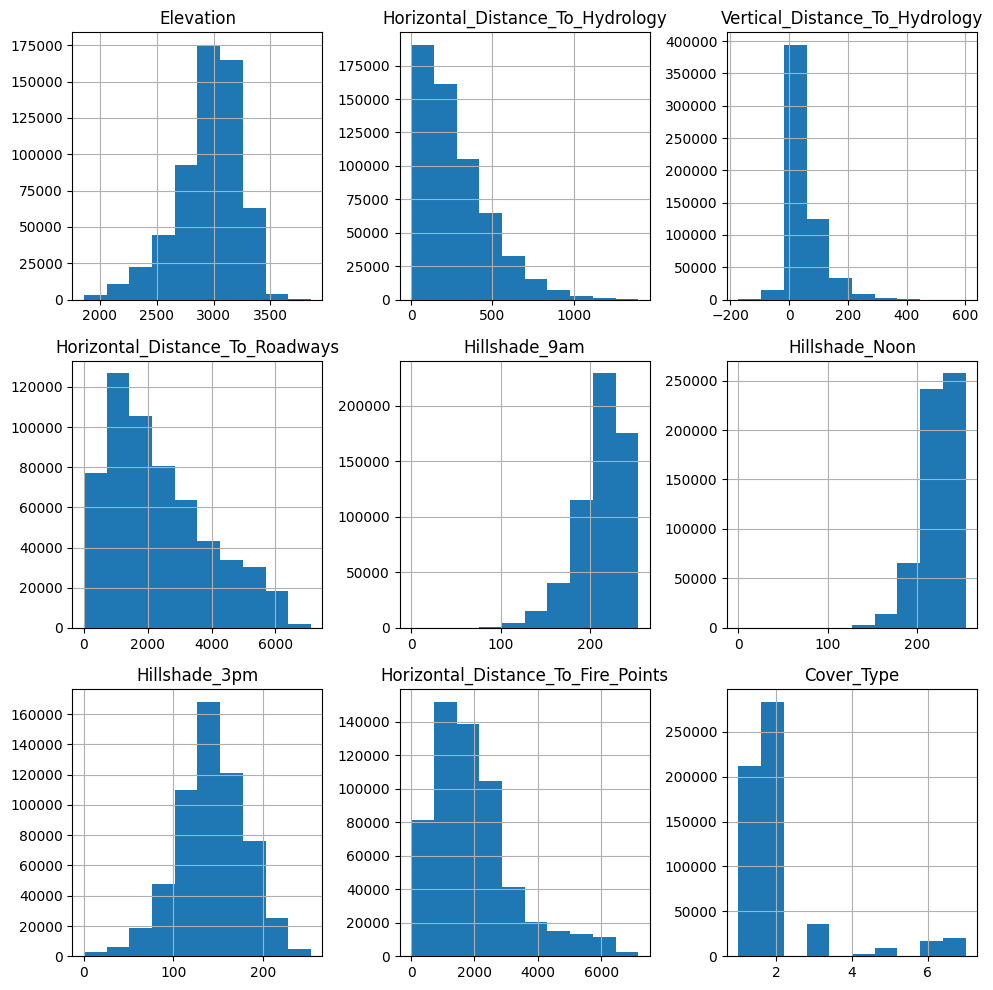

In [56]:
# 2.1
df_forestCovtype2.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [66]:
# 2.2
# IMPORTAR LIBRERÍAS NECESARIAS
from sklearn.preprocessing import LabelEncoder

In [67]:
etiquetado = LabelEncoder()
etiquetado.fit(df_forestCovtype2["Cover_Type"])

LabelEncoder()

In [68]:
etiquetado.classes_

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [74]:
df_forestCovtype2["Cover_Type_Num"] = etiquetado.transform(df_forestCovtype2["Cover_Type"])
df_forestCovtype2.groupby(["Cover_Type", "Cover_Type_Num"]).count()

df_forestCovtype3 = df_forestCovtype2.drop("Cover_Type", axis = "columns")

pd.DataFrame(df_forestCovtype3)

,Elevation,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Cover_Type_Num
0,2590,212,-6,390,220,235,151,6225,4
1,2804,268,65,3180,234,238,135,6121,1
2,2785,242,118,3090,238,238,122,6211,1
3,2595,153,-1,391,220,234,150,6172,4
4,2579,300,-15,67,230,237,140,6031,1
...,...,...,...,...,...,...,...,...,...
581006,2396,85,17,108,240,237,118,837,2
581007,2391,67,12,95,240,237,119,845,2
581008,2386,60,7,90,236,241,130,854,2
581009,2384,60,5,90,230,245,143,864,2
